Kode Visualisasi Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# === Load Dataset ===
train = pd.read_csv("dreaddit-train.csv")
test = pd.read_csv("dreaddit-test.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)

# Preview dataset
display(train.head())


Train shape: (2838, 116)
Test shape: (715, 116)


,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


Distribusi Label

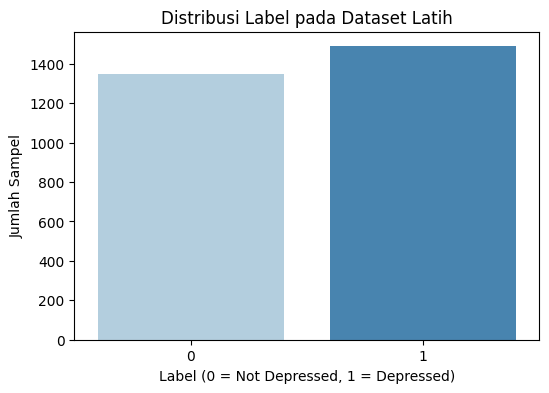

In [2]:
plt.figure(figsize=(6,4))
sns.countplot(x="label", data=train, palette="Blues", hue="label", legend=False)
plt.title("Distribusi Label pada Dataset Latih")
plt.xlabel("Label (0 = Not Depressed, 1 = Depressed)")
plt.ylabel("Jumlah Sampel")
plt.show()


Panjang Teks

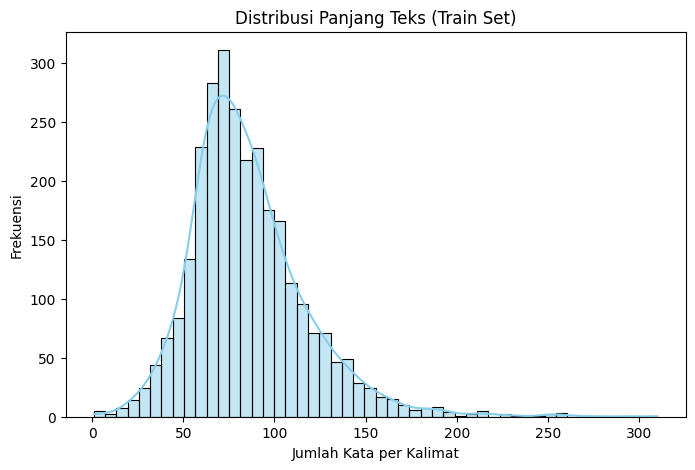

In [3]:
# Hitung jumlah kata per kalimat
train["text_length"] = train["text"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8,5))
sns.histplot(train["text_length"], bins=50, kde=True, color="skyblue")
plt.title("Distribusi Panjang Teks (Train Set)")
plt.xlabel("Jumlah Kata per Kalimat")
plt.ylabel("Frekuensi")
plt.show()

Rata-rata Panjang Teks per Label

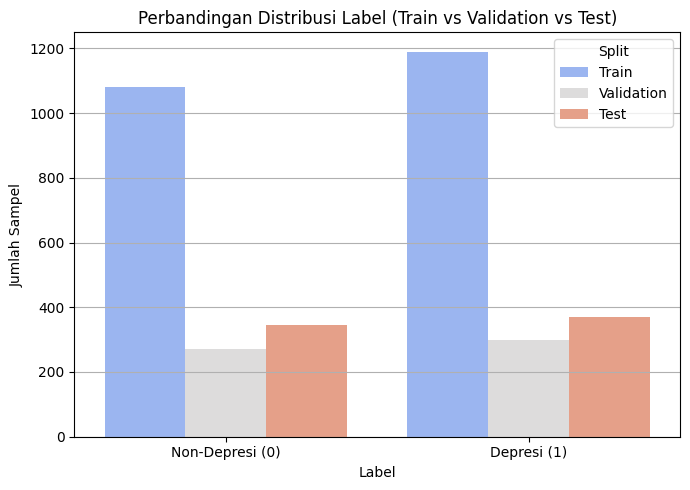

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load data
df_train_full = pd.read_csv("dreaddit-train.csv")
df_test = pd.read_csv("dreaddit-test.csv")

# Split train into train (64%) and validation (16%) stratified by label
train_df, val_df = train_test_split(
    df_train_full, test_size=0.2, random_state=42, stratify=df_train_full['label'])

# Tambahkan kolom split untuk masing-masing
train_df['split'] = 'Train'
val_df['split'] = 'Validation'
df_test['split'] = 'Test'

# Gabungkan semuanya
combined = pd.concat([
    train_df[['text', 'label', 'split']],
    val_df[['text', 'label', 'split']],
    df_test[['text', 'label', 'split']]
])

# Plot distribusi label per split
plt.figure(figsize=(7,5))
sns.countplot(data=combined, x="label", hue="split", palette="coolwarm")

plt.title("Perbandingan Distribusi Label (Train vs Validation vs Test)")
plt.xlabel("Label")
plt.ylabel("Jumlah Sampel")
plt.xticks([0, 1], ["Non-Depresi (0)", "Depresi (1)"])
plt.legend(title="Split")
plt.tight_layout()
plt.grid(axis='y')

plt.show()


Boxplot Panjang Teks per Label

C:\Users\User\AppData\Local\Temp\ipykernel_30752\1766402053.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="text_length", data=train, palette="pastel")


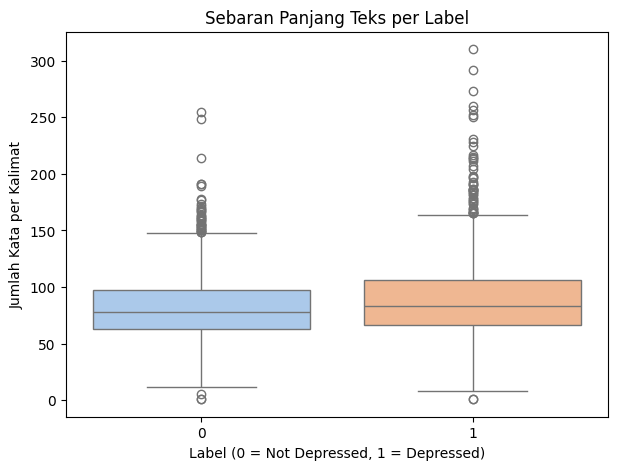

In [5]:
plt.figure(figsize=(7,5))
sns.boxplot(x="label", y="text_length", data=train, palette="pastel")
plt.title("Sebaran Panjang Teks per Label")
plt.xlabel("Label (0 = Not Depressed, 1 = Depressed)")
plt.ylabel("Jumlah Kata per Kalimat")
plt.show()

isi kolom dataset

In [7]:
print("Jumlah kolom:", len(train.columns))
display("Nama-nama kolom dataset train:", np.array(train.columns).flatten())

Jumlah kolom: 117


'Nama-nama kolom dataset train:'

array(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       'lex_liwc_WC', 'lex_liwc_Analytic', 'lex_liwc_Clout',
       'lex_liwc_Authentic', 'lex_liwc_Tone', 'lex_liwc_WPS',
       'lex_liwc_Sixltr', 'lex_liwc_Dic', 'lex_liwc_function',
       'lex_liwc_pronoun', 'lex_liwc_ppron', 'lex_liwc_i', 'lex_liwc_we',
       'lex_liwc_you', 'lex_liwc_shehe', 'lex_liwc_they',
       'lex_liwc_ipron', 'lex_liwc_article', 'lex_liwc_prep',
       'lex_liwc_auxverb', 'lex_liwc_adverb', 'lex_liwc_conj',
       'lex_liwc_negate', 'lex_liwc_verb', 'lex_liwc_adj',
       'lex_liwc_compare', 'lex_liwc_interrog', 'lex_liwc_number',
       'lex_liwc_quant', 'lex_liwc_affect', 'lex_liwc_posemo',
       'lex_liwc_negemo', 'lex_liwc_anx', 'lex_liwc_anger',
       'lex_liwc_sad', 'lex_liwc_social', 'lex_liwc_family',
       'lex_liwc_friend', 'lex_liwc_female', 'lex_liwc_male',
       'lex_liwc_cogproc', 'lex_liwc_insig

In [8]:
print("Jumlah kolom:", len(test.columns))
display("Nama-nama kolom dataset test:", np.array(test.columns).flatten())

Jumlah kolom: 116


'Nama-nama kolom dataset test:'

array(['id', 'subreddit', 'post_id', 'sentence_range', 'text', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       'lex_liwc_WC', 'lex_liwc_Analytic', 'lex_liwc_Clout',
       'lex_liwc_Authentic', 'lex_liwc_Tone', 'lex_liwc_WPS',
       'lex_liwc_Sixltr', 'lex_liwc_Dic', 'lex_liwc_function',
       'lex_liwc_pronoun', 'lex_liwc_ppron', 'lex_liwc_i', 'lex_liwc_we',
       'lex_liwc_you', 'lex_liwc_shehe', 'lex_liwc_they',
       'lex_liwc_ipron', 'lex_liwc_article', 'lex_liwc_prep',
       'lex_liwc_auxverb', 'lex_liwc_adverb', 'lex_liwc_conj',
       'lex_liwc_negate', 'lex_liwc_verb', 'lex_liwc_adj',
       'lex_liwc_compare', 'lex_liwc_interrog', 'lex_liwc_number',
       'lex_liwc_quant', 'lex_liwc_affect', 'lex_liwc_posemo',
       'lex_liwc_negemo', 'lex_liwc_anx', 'lex_liwc_anger',
       'lex_liwc_sad', 'lex_liwc_social', 'lex_liwc_family',
       'lex_liwc_friend', 'lex_liwc_female', 'lex_liwc_male',
       'lex_liwc_cogproc', 'lex_liwc_insig

In [9]:
import pandas as pd

# Tampilkan seluruh isi kolom teks
pd.set_option('display.max_colwidth', None)

# Load dataset
df = pd.read_csv("dreaddit-train.csv")

# Ambil 1 contoh teks depresi
sample_depresi = df[df['label'] == 1][['text', 'label']].sample(n=1)

# Ambil 1 contoh teks non-depresi
sample_nondepresi = df[df['label'] == 0][['text', 'label']].sample(n=1)

# Gabungkan keduanya
sample_combined = pd.concat([sample_depresi, sample_nondepresi])

# Format tampilan
sample_combined.rename(columns={"text": "Text", "label": "LABEL"}, inplace=True)
sample_combined.index.name = "No"

# Tampilkan
display(sample_combined)

,Text,LABEL
No,,
2295,"Now: The brother who texted me just had a baby girl with his wife. He now has a total of three baby girls at home (age range 3-0). Gut reaction: fear, dread, anxiety. I don’t want to meet her.",1
1496,"Hey I was wondering if anyone between the ages of 15-18 (I just find it easier to talk to people around my age, I'm 17) would want to join my Reddit chat group for people who are introverted or suck at socializing like me (don't worry if you just want to listen that's fine too) Some things I like Soccer Tv/movies Music",0
